### Sebastián Rodríguez
### Carnet: 20003076

# Informe Individual - SVM

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

sess = tf.Session()

iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

¿Qué es el algoritmo SVM?

Consiste en un algoritmo de clasificación binaria que puede admitir claisificación lineal y no lineal. Consiste en maximizar la distancia entre 2 distintos tipos de datos para lo cual es necesario encontrar un "Hiperplano". 

El SVM trata de que este espacio sea tan máximo como sea posible para garantizar que el error clasificador sea lo más pequeño posible. 

In [17]:
train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8),
                                 replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

#  Utilizando la función de costo en el video 4

### ¿Como podemos entrenar el modelo?

Para entrenar SVM necesitamos informarle qué elementos del diccionario devueltos por la función cuales son características y cuáles son etiquetas. Creamos dos características 1D de valores reales llamados x e y. Tenemos un tensor 1D que contiene etiquetas de cadena para nuestros ejemplos. En nuestro caso, todos los ejemplos se devuelven a la vez. Sin embargo, en aplicaciones reales, podría crear una función que lea datos de un archivo o un servidor y devuelva lotes. También podría devolver los mismos lotes repetidamente, en cuyo caso example_id debería reflejar esto. Al llamar al método de ajuste del estimador, también especificamos el número de pasos que debe ejecutar. Alternativamente, podríamos especificar max_steps para ejecutar. Con pasos, cada vez que llamamos al método fit (cosa que no estamos haciendo para este curso), ejecuta el número dado de pasos. 

Con una función que pasos máximos (no utilizado en este código), una vez que el estimador se ejecutó para ese número de pasos, cualquier llamada posterior para ajustarse se realiza inmediatamente, sin realizar ningún ajuste adicional de datos.



In [3]:
batch_size = 100

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.subtract(tf.matmul(x_data, A), b)
l2_norm = tf.reduce_sum(tf.square(A))

Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
alpha = tf.constant([0.01])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [4]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(20000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Las funciones del kernel incluyen el kernel sigmoide, el kernel lineal, el kernel polinomial y el kernel gaussiano. Entre ellas, el kernel gaussiano y el kernel polinomial se usan más comúnmente. Ambas funciones del kernel pueden mapear datos de baja dimensión a datos de alta dimensión.

De esta manera, se mapean los datos bidimensionales en datos tridimensionales. Para el mapeo del núcleo gaussiano, se utilizará la expansión de la serie Taylor, y nosotros lo derivamos usando tensorflow cuando es necesario.

En este ejemplo solo encontramos un conjunto de datos separables lineales para construir el clasificador lineal de clasificación binaria. ** Un poco confuso el juego de palabras.


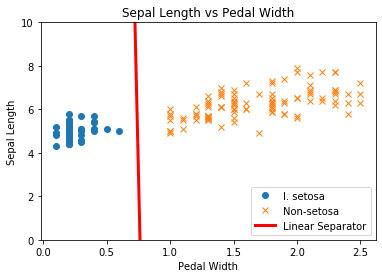

In [5]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1
best_fit = []

x1_vals = [d[1] for d in x_vals]

for i in x1_vals:
    best_fit.append(slope*i+y_intercept)


# Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Ventajas y Desventajas 


1) Son computacionalmente simples y rápidos de ejecutar.

2) Son fácilmente escalables a bases de datos de alta dimensionalidad, ya que la selección de atributos sólo necesita ser aplicada una vez, para luego evaluar el desempeño de diferentes métodos de clasificación.

3) Estos métodos ignoran las interacciones con el método predictivo, y, por ende, las relaciones entre las distintas variables.

4) Sus principales desventajas son su alto costo computacional y un mayor riesgo de sobre-ajuste del modelo


# Kernel Functions

Los algoritmos SVM usan un conjunto de funciones matemáticas que se definen como el núcleo. La función del núcleo es tomar datos como entrada y transformarlos en la forma requerida. 

Diferentes algoritmos SVM utilizan diferentes tipos de funciones del núcleo. Estas funciones pueden ser de diferentes tipos. Por ejemplo:

- lineal
- no lineal
- polinomial
- función de base radial (RBF) 
- sigmoide.

Las funciones del núcleo devuelven el producto interno entre dos puntos en un espacio de características adecuado. Por lo tanto, al definir una noción de similitud, con poco costo computacional, incluso en espacios de dimensiones muy altas.